**All-ones or all-zeros tensors**

In [1]:
import tensorflow as tf

tf.__version__

'2.10.0'

In [2]:

x = tf.ones(shape=(2, 1))
print(x)

tf.Tensor(
[[1.]
 [1.]], shape=(2, 1), dtype=float32)


In [3]:
x = tf.zeros(shape=(2, 1))
print(x)

tf.Tensor(
[[0.]
 [0.]], shape=(2, 1), dtype=float32)


**Random tensors**

In [4]:
x = tf.random.normal(shape=(3, 1), mean=0., stddev=1.)
print(x)

tf.Tensor(
[[-0.11869936]
 [-0.99540776]
 [-0.39553168]], shape=(3, 1), dtype=float32)


In [5]:
x = tf.random.uniform(shape=(3, 1), minval=0., maxval=1.)
print(x)

tf.Tensor(
[[0.29850125]
 [0.2488128 ]
 [0.7303479 ]], shape=(3, 1), dtype=float32)


**NumPy arrays are assignable**

In [6]:
import numpy as np
x = np.ones(shape=(2, 2))
x[0, 0] = 0.

**Creating a TensorFlow variable**

In [7]:
v = tf.Variable(initial_value=tf.random.normal(shape=(3, 1)))
print(v)

<tf.Variable 'Variable:0' shape=(3, 1) dtype=float32, numpy=
array([[-0.65224904],
       [-0.16518424],
       [-2.2500322 ]], dtype=float32)>


**Assigning a value to a TensorFlow variable**

In [8]:
v.assign(tf.ones((3, 1)))

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[1.],
       [1.],
       [1.]], dtype=float32)>

**Assigning a value to a subset of a TensorFlow variable**

In [9]:
v[0, 0].assign(3.)

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[3.],
       [1.],
       [1.]], dtype=float32)>

**Using `assign_add`**

In [10]:
v.assign_add(tf.ones((3, 1)))

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[4.],
       [2.],
       [2.]], dtype=float32)>

#### Tensor operations: Doing math in TensorFlow

**A few basic math operations**

In [11]:
a = tf.ones((2, 2))
b = tf.square(a)
c = tf.sqrt(a)
d = b + c
e = tf.matmul(a, b)
e *= d

#### A second look at the GradientTape API

**Using the `GradientTape`**

In [12]:
input_var = tf.Variable(initial_value=3.)
with tf.GradientTape() as tape:
   result = tf.square(input_var)
gradient = tape.gradient(result, input_var)

**Using `GradientTape` with constant tensor inputs**

In [13]:
input_const = tf.constant(3.)
with tf.GradientTape() as tape:
   tape.watch(input_const)
   result = tf.square(input_const)
gradient = tape.gradient(result, input_const)

**Using nested gradient tapes to compute second-order gradients**

In [14]:
time = tf.Variable(0.)
with tf.GradientTape() as outer_tape:
    with tf.GradientTape() as inner_tape:
        position =  4.9 * time ** 2
    speed = inner_tape.gradient(position, time)
acceleration = outer_tape.gradient(speed, time)

#### An end-to-end example: A linear classifier in pure TensorFlow

**Generating two classes of random points in a 2D plane**

In [15]:
num_samples_per_class = 1000
negative_samples = np.random.multivariate_normal(
    mean=[0, 3],
    cov=[[1, 0.5],[0.5, 1]],
    size=num_samples_per_class)
positive_samples = np.random.multivariate_normal(
    mean=[3, 0],
    cov=[[1, 0.5],[0.5, 1]],
    size=num_samples_per_class)

**Stacking the two classes into an array with shape (2000, 2)**

In [16]:
inputs = np.vstack((negative_samples, positive_samples)).astype(np.float32)

**Generating the corresponding targets (0 and 1)**

In [17]:
targets = np.vstack((np.zeros((num_samples_per_class, 1), dtype="float32"),
                     np.ones((num_samples_per_class, 1), dtype="float32")))

**Plotting the two point classes**

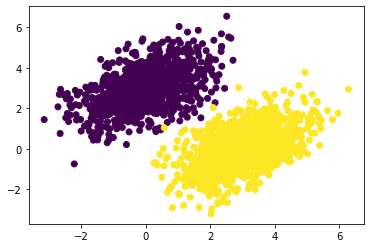

In [18]:
import matplotlib.pyplot as plt
plt.scatter(inputs[:, 0], inputs[:, 1], c=targets[:, 0])
plt.show()

**Creating the linear classifier variables**

In [19]:
input_dim = 2
output_dim = 1
W = tf.Variable(initial_value=tf.random.uniform(shape=(input_dim, output_dim)))
b = tf.Variable(initial_value=tf.zeros(shape=(output_dim,)))

**The forward pass function**

In [20]:
def model(inputs):
    return tf.matmul(inputs, W) + b

**The mean squared error loss function**

In [21]:
def square_loss(targets, predictions):
    per_sample_losses = tf.square(targets - predictions)
    return tf.reduce_mean(per_sample_losses)

**The training step function**

In [22]:
learning_rate = 0.1

def training_step(inputs, targets):
    with tf.GradientTape() as tape:
        predictions = model(inputs)
        loss = square_loss(targets, predictions)
    grad_loss_wrt_W, grad_loss_wrt_b = tape.gradient(loss, [W, b])
    W.assign_sub(grad_loss_wrt_W * learning_rate)
    b.assign_sub(grad_loss_wrt_b * learning_rate)
    return loss

**The batch training loop**

In [23]:
for step in range(40):
    loss = training_step(inputs, targets)
    print(f"Loss at step {step}: {loss:.4f}")

Loss at step 0: 3.0613
Loss at step 1: 0.4524
Loss at step 2: 0.1672
Loss at step 3: 0.1227
Loss at step 4: 0.1101
Loss at step 5: 0.1022
Loss at step 6: 0.0955
Loss at step 7: 0.0894
Loss at step 8: 0.0839
Loss at step 9: 0.0788
Loss at step 10: 0.0742
Loss at step 11: 0.0700
Loss at step 12: 0.0661
Loss at step 13: 0.0626
Loss at step 14: 0.0594
Loss at step 15: 0.0565
Loss at step 16: 0.0538
Loss at step 17: 0.0513
Loss at step 18: 0.0491
Loss at step 19: 0.0471
Loss at step 20: 0.0452
Loss at step 21: 0.0435
Loss at step 22: 0.0419
Loss at step 23: 0.0405
Loss at step 24: 0.0392
Loss at step 25: 0.0380
Loss at step 26: 0.0369
Loss at step 27: 0.0360
Loss at step 28: 0.0351
Loss at step 29: 0.0342
Loss at step 30: 0.0335
Loss at step 31: 0.0328
Loss at step 32: 0.0322
Loss at step 33: 0.0316
Loss at step 34: 0.0311
Loss at step 35: 0.0306
Loss at step 36: 0.0301
Loss at step 37: 0.0297
Loss at step 38: 0.0294
Loss at step 39: 0.0291


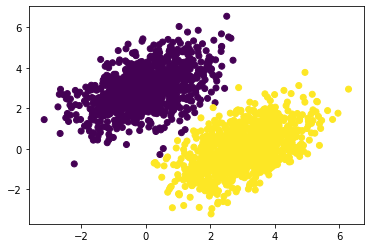

In [24]:
predictions = model(inputs)
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)
plt.show()

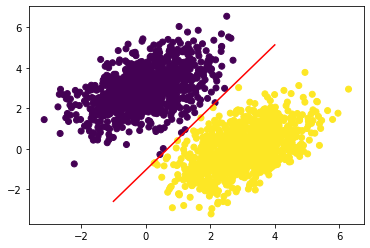

In [25]:
x = np.linspace(-1, 4, 100)
y = - W[0] /  W[1] * x + (0.5 - b) / W[1]
plt.plot(x, y, "-r")
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)

## Anatomy of a neural network: Understanding core Keras APIs

### Layers: The building blocks of deep learning

#### The base Layer class in Keras

**A `Dense` layer implemented as a `Layer` subclass**

In [26]:
from tensorflow import keras

class SimpleDense(keras.layers.Layer):

    def __init__(self, units, activation=None):
        super().__init__()
        self.units = units
        self.activation = activation

    def build(self, input_shape):
        input_dim = input_shape[-1]
        self.W = self.add_weight(shape=(input_dim, self.units),
                                 initializer="random_normal")
        self.b = self.add_weight(shape=(self.units,),
                                 initializer="zeros")

    def call(self, inputs):
        y = tf.matmul(inputs, self.W) + self.b
        if self.activation is not None:
            y = self.activation(y)
        return y

In [27]:
my_dense = SimpleDense(units=32, activation=tf.nn.relu)
input_tensor = tf.ones(shape=(2, 784))
output_tensor = my_dense(input_tensor)
print(output_tensor.shape)

(2, 32)


#### Automatic shape inference: Building layers on the fly

In [28]:
from tensorflow.keras import layers
layer = layers.Dense(32, activation="relu")

In [29]:
from tensorflow.keras import models
from tensorflow.keras import layers
model = models.Sequential([
    layers.Dense(32, activation="relu"),
    layers.Dense(32)
])

In [30]:
model = keras.Sequential([
    SimpleDense(32, activation="relu"),
    SimpleDense(64, activation="relu"),
    SimpleDense(32, activation="relu"),
    SimpleDense(10, activation="softmax")
])

### From layers to models

### The "compile" step: Configuring the learning process

In [31]:
model = keras.Sequential([keras.layers.Dense(1)])
model.compile(optimizer="rmsprop",
              loss="mean_squared_error",
              metrics=["accuracy"])

In [32]:
model.compile(optimizer=keras.optimizers.RMSprop(),
              loss=keras.losses.MeanSquaredError(),
              metrics=[keras.metrics.BinaryAccuracy()])

### Picking a loss function

### Understanding the fit() method

**Calling `fit()` with NumPy data**

In [33]:
history = model.fit(
    inputs,
    targets,
    epochs=5,
    batch_size=128
)

Epoch 1/5
16/16 [==============================] - 0s 2ms/step - loss: 10.5053 - binary_accuracy: 0.4450
Epoch 2/5
16/16 [==============================] - 0s 2ms/step - loss: 10.0258 - binary_accuracy: 0.4440
Epoch 3/5
16/16 [==============================] - 0s 2ms/step - loss: 9.6242 - binary_accuracy: 0.4415
Epoch 4/5
16/16 [==============================] - 0s 2ms/step - loss: 9.2408 - binary_accuracy: 0.4380
Epoch 5/5
16/16 [==============================] - 0s 2ms/step - loss: 8.8695 - binary_accuracy: 0.4370


In [34]:
history.history

{'loss': [10.505297660827637,
  10.02579116821289,
  9.624153137207031,
  9.240758895874023,
  8.869455337524414],
 'binary_accuracy': [0.4449999928474426,
  0.4440000057220459,
  0.4415000081062317,
  0.43799999356269836,
  0.43700000643730164]}

### Monitoring loss and metrics on validation data

**Using the `validation_data` argument**

In [35]:
model = keras.Sequential([keras.layers.Dense(1)])
model.compile(optimizer=keras.optimizers.RMSprop(learning_rate=0.1),
              loss=keras.losses.MeanSquaredError(),
              metrics=[keras.metrics.BinaryAccuracy()])

indices_permutation = np.random.permutation(len(inputs))
shuffled_inputs = inputs[indices_permutation]
shuffled_targets = targets[indices_permutation]

num_validation_samples = int(0.3 * len(inputs))
val_inputs = shuffled_inputs[:num_validation_samples]
val_targets = shuffled_targets[:num_validation_samples]
training_inputs = shuffled_inputs[num_validation_samples:]
training_targets = shuffled_targets[num_validation_samples:]
model.fit(
    training_inputs,
    training_targets,
    epochs=5,
    batch_size=16,
    validation_data=(val_inputs, val_targets)
)

Epoch 1/5
88/88 [==============================] - 1s 4ms/step - loss: 0.1614 - binary_accuracy: 0.9329 - val_loss: 0.0368 - val_binary_accuracy: 0.9950
Epoch 2/5
88/88 [==============================] - 0s 3ms/step - loss: 0.0700 - binary_accuracy: 0.9543 - val_loss: 0.0795 - val_binary_accuracy: 0.9567
Epoch 3/5
88/88 [==============================] - 0s 3ms/step - loss: 0.0708 - binary_accuracy: 0.9557 - val_loss: 0.2170 - val_binary_accuracy: 0.9483
Epoch 4/5
88/88 [==============================] - 0s 2ms/step - loss: 0.0743 - binary_accuracy: 0.9557 - val_loss: 0.2079 - val_binary_accuracy: 0.7133
Epoch 5/5
88/88 [==============================] - 0s 3ms/step - loss: 0.0703 - binary_accuracy: 0.9543 - val_loss: 0.0732 - val_binary_accuracy: 0.9783


### Inference: Using a model after training

In [36]:
predictions = model.predict(val_inputs, batch_size=128)
print(predictions[:10])

5/5 [==============================] - 0s 1ms/step
[[ 0.564574  ]
 [-0.05152744]
 [ 0.17211619]
 [ 1.4492466 ]
 [ 0.0696145 ]
 [ 0.36958578]
 [ 1.174274  ]
 [ 0.9541193 ]
 [ 1.2841735 ]
 [ 1.2272875 ]]


## Summary